In [1]:
from fine_tuned import AdaptedModel

In [2]:
model = AdaptedModel()
model.load('weights/adapted-1.pth')

/Users/supremegg/Documents/GitHub/surgical-hand-tremor/model/fine_tuned.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=s

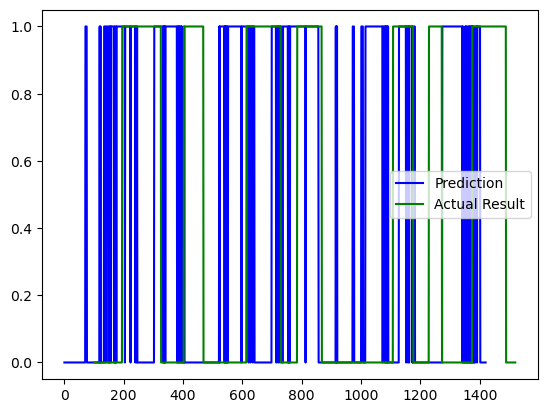

In [4]:
# Now run a classification test
import pandas as pd

df = pd.read_csv('data/tremor_data2.csv')
aX, aY, aZ = df['aX'], df['aY'], df['aZ']
result = df['Result']

# We need to normalize the data
aX = (aX - aX.mean()) / aX.std()
aY = (aY - aY.mean()) / aY.std()
aZ = (aZ - aZ.mean()) / aZ.std()

# Now we need to convert the data into the format that the model expects
import numpy as np
# The model expects : (batch, window len, 3)
# We will use a window length of 100
window_len = 100
data = np.zeros((len(aX) - window_len, window_len, 3))
for i in range(len(aX) - window_len):
    data[i, :, 0] = aX[i:i + window_len]
    data[i, :, 1] = aY[i:i + window_len]
    data[i, :, 2] = aZ[i:i + window_len]

# Now we can run the model
import torch
data = torch.tensor(data, dtype=torch.float32)
prediction = model.inference(data)

# Now we can compare the prediction to the actual result
import matplotlib.pyplot as plt
plt.plot(prediction, label='Prediction', color='blue')
plt.plot(result[window_len:], label='Actual Result', color='green')
plt.legend()
plt.show()